In [5]:
%matplotlib inline

This script is to perform KMeans clustering on English football players. The original data is scraped from http://sofifa.com.

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data

In [3]:
#load data
df = pd.read_csv('EnglishPlayers.csv')
df.head()

In [ ]:
#adjust the attributes (Excludes name and url). 
X = df.iloc[:,2:]

# Elbow analysis

How many clusters? From the plot, 4 seems to be a good choice. It is a reasonable number too, as there are 4 general positions in football.

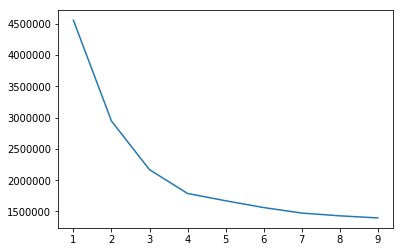

In [6]:
distances = []

for i in range(1,10):
    clst = KMeans(n_clusters=i)
    clst.fit(X)
    distances.append(clst.inertia_)
    
plt.plot(list(range(1,10)), distances)
plt.show()

# Clustering

In [8]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
df["cluster"] = kmeans.labels_
#check count for each cluster
num_players_per_cluster = df.groupby(['cluster']).size().reset_index(name='counts')
num_players_per_cluster

,cluster,counts
0,0,159
1,1,156
2,2,35
3,3,120


In [9]:
#check average attributes for each cluster
cluster_mean = df.groupby(['cluster']).mean()
cluster_mean

,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Dribbling,Curve,Free kick accuracy,Long passing,Ball control,...,Penalties,Composure,Marking,Standing tackle,Sliding tackle,GK diving,GK handling,GK kicking,GK positioning,GK reflexes
cluster,,,,,,,,,,,,,,,,,,,,,
0,66.603774,56.471698,58.773585,70.987421,53.056604,67.383648,61.679245,57.723270,67.075472,69.987421,...,57.081761,68.628931,62.371069,66.540881,64.698113,10.880503,10.867925,10.811321,10.691824,10.534591
1,57.660256,63.788462,54.403846,62.083333,56.807692,66.807692,58.679487,52.891026,54.346154,66.724359,...,62.153846,63.224359,27.807692,32.038462,28.455128,10.641026,11.070513,11.134615,10.884615,10.660256
2,14.542857,14.314286,14.942857,30.800000,13.628571,15.200000,14.800000,15.142857,30.457143,25.200000,...,24.628571,46.142857,13.800000,14.514286,13.885714,72.200000,69.400000,67.942857,70.114286,73.514286
3,46.250000,31.525000,66.575000,60.775000,31.833333,49.775000,37.058333,32.183333,57.366667,59.291667,...,39.675000,60.783333,67.550000,66.316667,66.716667,10.725000,11.550000,10.916667,10.775000,11.291667
